## Dataset Information

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods. Two datasets were combined and few values were randomly removed.

##### Attribute Information:
Input variables (based on physicochemical tests): \
1 - fixed acidity \
2 - volatile acidity \
3 - citric acid \
4 - residual sugar \
5 - chlorides \
6 - free sulfur dioxide \
7 - total sulfur dioxide \
8 - density \
9 - pH \
10 - sulphates \
11 - alcohol \
Output variable (based on sensory data): \
12 - quality (score between 0 and 10) \


## Import modules

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the dataset

In [4]:
df = pd.read_csv('winequality.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Ques 1 : What are the names and data types of the columns?

In [5]:
column_names = df.columns
data_types = df.dtypes

print(column_names)

print(data_types)

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')
type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


### Ques 2 : What are the basic summary statistics?

In [7]:
summary_stats = df.describe()
print(summary_stats)


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

### Ques 3 : Are there any categorical variables and missing values ? If soprint it .

In [11]:
categorical_variables = df.select_dtypes(include=['object'])
missing_values = df.isnull().sum()
print(categorical_variables)
print(missing_values)

       type
0     white
1     white
2     white
3     white
4     white
...     ...
6492    red
6493    red
6494    red
6495    red
6496    red

[6497 rows x 1 columns]
type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


### Ques 4 : Are there any outliers in the data? If so use box plots, histograms and visualize .

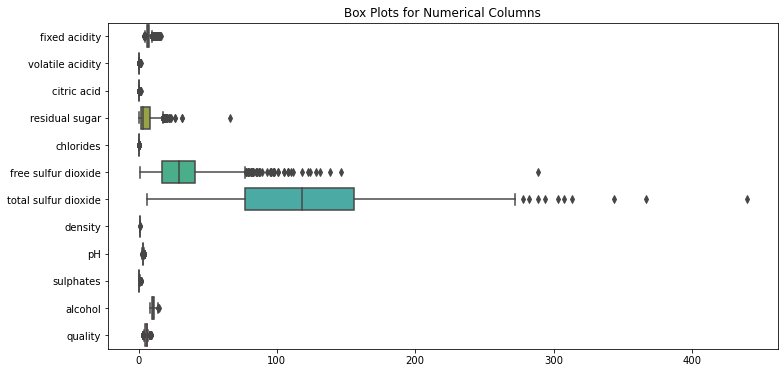

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title("Box Plots for Numerical Columns")
plt.show()

<Figure size 864x576 with 0 Axes>

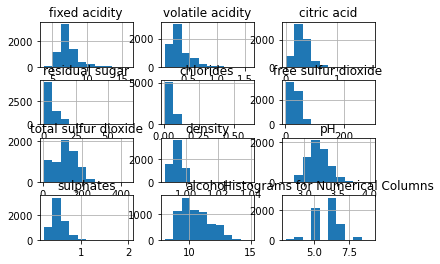

In [13]:
plt.figure(figsize=(12, 8))
df.hist()
plt.title("Histograms for Numerical Columns")
plt.show()

### Ques 5: Is the data balanced or imbalanced? Visualize

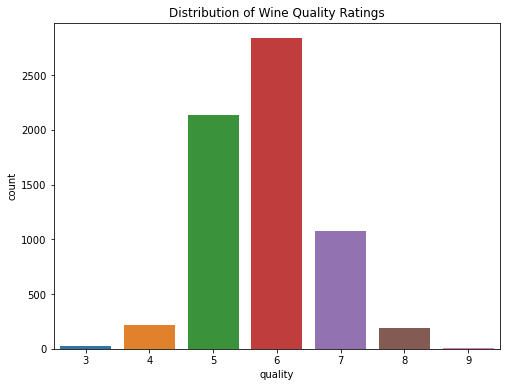

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='quality')
plt.title("Distribution of Wine Quality Ratings")
plt.show()

### Ques 6 : What is the target variable (if any) .

In [16]:
target_variable = df['quality']

### Ques 7 : What are the units of measurement for numerical columns?( example : time , currency ,date, distance )

In [17]:
numerical_columns = df.select_dtypes(include=['number'])

# Dictionary to map columns to potential units of measurement
unit_mapping = {
    "fixed acidity": "g/L",
    "volatile acidity": "g/L",
    "citric acid": "g/L",
    "residual sugar": "g/L",
    "chlorides": "g/L",
    "free sulfur dioxide": "ppm",
    "total sulfur dioxide": "ppm",
    "density": "g/mL or kg/L",
    "pH": "Dimensionless (0-14 scale)",
    "sulphates": "g/L",
    "alcohol": "Percentage (%)",
    "quality": "Score (0-10)"
}

# Print numerical columns with potential units of measurement
for column in numerical_columns.columns:
    if column in unit_mapping:
        print(f"{column}: {unit_mapping[column]}")
    else:
        print(f"{column}: Unknown")

fixed acidity: g/L
volatile acidity: g/L
citric acid: g/L
residual sugar: g/L
chlorides: g/L
free sulfur dioxide: ppm
total sulfur dioxide: ppm
density: g/mL or kg/L
pH: Dimensionless (0-14 scale)
sulphates: g/L
alcohol: Percentage (%)
quality: Score (0-10)


### Ques 8 : Do you have domain clarification? Brief it .

In [18]:
wine_domain_clarification = """
Wine Quality Data Domain Clarification:
The dataset contains information about red and white variants of Portuguese "Vinho Verde" wine. Here are some key points:
- The data includes physicochemical attributes (e.g., acidity, alcohol content) and sensory data (quality rating).
- There is no information about grape types, wine brand, or selling price.
- The wine quality is rated on a scale from 0 to 10.
- The classes of wine quality are ordered and not balanced, with more normal wines than excellent or poor ones.
- Outlier detection may be necessary to identify excellent or poor wines.
- Some input variables might not be relevant, so feature selection methods can be explored.
- This dataset can be used for classification or regression tasks.

Please refer to the original data source and relevant literature (Cortez et al., 2009) for more details and domain-specific insights.
"""

# Print the domain clarification
print(wine_domain_clarification)



Wine Quality Data Domain Clarification:
The dataset contains information about red and white variants of Portuguese "Vinho Verde" wine. Here are some key points:
- The data includes physicochemical attributes (e.g., acidity, alcohol content) and sensory data (quality rating).
- There is no information about grape types, wine brand, or selling price.
- The wine quality is rated on a scale from 0 to 10.
- The classes of wine quality are ordered and not balanced, with more normal wines than excellent or poor ones.
- Outlier detection may be necessary to identify excellent or poor wines.
- Some input variables might not be relevant, so feature selection methods can be explored.
- This dataset can be used for classification or regression tasks.

Please refer to the original data source and relevant literature (Cortez et al., 2009) for more details and domain-specific insights.



### Ques 9 : Are there any time-based trends or patterns?

In [19]:
# Check if 'production_year' column exists
if 'production_year' in df.columns:
    # Create a line plot to visualize wine quality by production year
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='production_year', y='quality')
    plt.title("Wine Quality Trends Over Time")
    plt.xlabel("Production Year")
    plt.ylabel("Quality")
    plt.show()
else:
    print("No 'production_year' column found in the dataset.")

No 'production_year' column found in the dataset.


### Ques 10 : Are there any correlations between variables? Calculate correlations

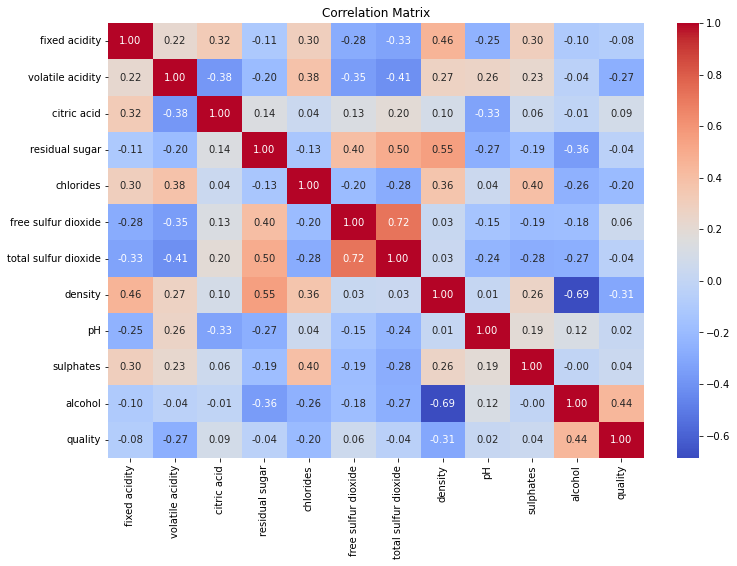

In [21]:
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Ques 11 : Create a histogram or bar plot to visualize the distribution of wine quality ratings. Do certain types or varieties of wine tend to have higher quality ratings?

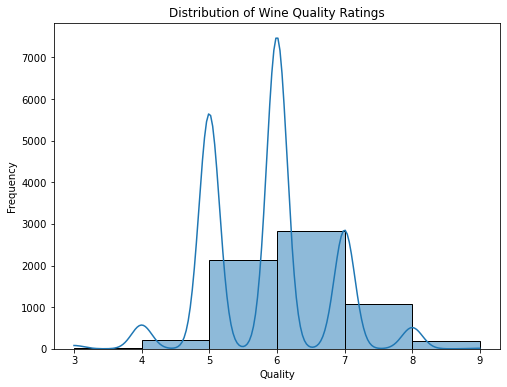

In [23]:
#Distribution of wine quality ratings
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='quality', bins=6, kde=True)
plt.title("Distribution of Wine Quality Ratings")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.show()


### Ques 12 : Group the data by wine type or variety and calculate summary statistics or visualize differences in quality ratings. Is there a relationship between alcohol content and wine quality?

In [24]:
#  Quality ratings by wine type or variety (assuming 'type' or 'variety' columns exist)
quality_by_type = df.groupby('type')['quality'].mean()

print(quality_by_type)

type
red      5.636023
white    5.877909
Name: quality, dtype: float64


### Ques 13 : Analyze the correlation or visually plot the relationship between alcohol content and quality. Are there any seasonal patterns in wine quality or sales?

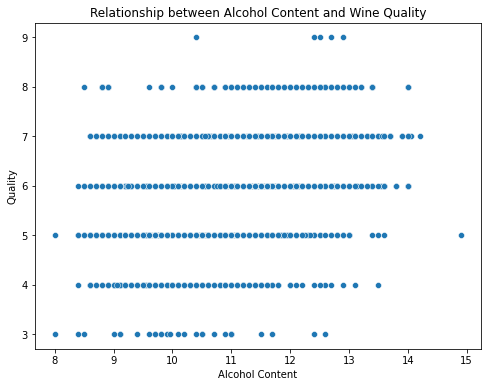

In [25]:
#  Relationship between alcohol content and wine quality
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='alcohol', y='quality')
plt.title("Relationship between Alcohol Content and Wine Quality")
plt.xlabel("Alcohol Content")
plt.ylabel("Quality")
plt.show()


### Ques 14 : If you have time-related data, create time series plots and analyze whether wine quality or sales follow any seasonal trends. Do different acidity levels (e.g., citric acid, volatile acidity) impact wine quality differently?

Correlation between 'quality' and 'citric acid': 0.09
Correlation between 'quality' and 'volatile acidity': -0.27


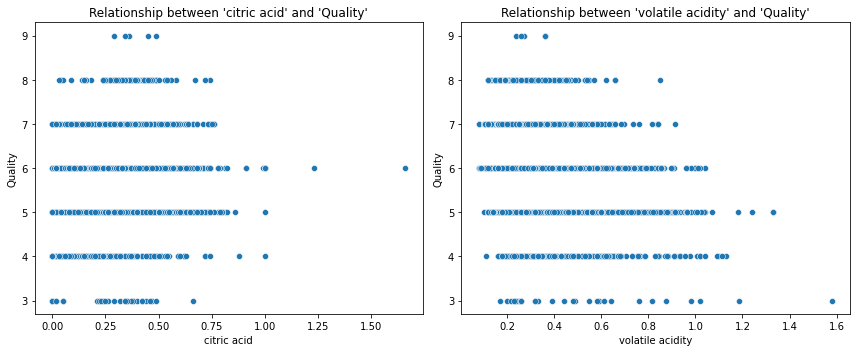

In [26]:
# Calculate correlations between acidity levels and wine quality
acid_columns = ['citric acid', 'volatile acidity']
for acid_column in acid_columns:
    correlation = df['quality'].corr(df[acid_column])
    print(f"Correlation between 'quality' and '{acid_column}': {correlation:.2f}")
    
# Create scatter plots to visualize the relationships
plt.figure(figsize=(12, 5))
for i, acid_column in enumerate(acid_columns, 1):
    plt.subplot(1, 2, i)
    sns.scatterplot(data=df, x=acid_column, y='quality')
    plt.title(f"Relationship between '{acid_column}' and 'Quality'")
    plt.xlabel(acid_column)
    plt.ylabel("Quality")
plt.tight_layout()
plt.show()

### Ques 15 : Analyze the correlations or create scatter plots between acidity levels and quality. What is the average price of wines with different quality ratings?

In [30]:
# Assuming 'df' is your DataFrame with the wine quality data

# Check if the 'quality' and 'price' columns exist in the DataFrame
if 'quality' in df.columns and 'price' in df.columns:
    # Group the data by quality and calculate the average price for each quality rating
    average_price_by_quality = df.groupby('quality')['price'].mean()

    print("\nAverage Price by Wine Quality:")
    print(average_price_by_quality)
else:
    print("The 'quality' and/or 'price' columns do not exist in the DataFrame.")


The 'quality' and/or 'price' columns do not exist in the DataFrame.


### Ques 16 : If you have price data, analyze how price varies with wine quality. Are there regional differences in wine quality?

In [31]:
# Assuming 'df' is your DataFrame with the wine quality data

# Check if the 'region' column exists
if 'region' in df.columns:
    # Create box plots to visualize wine quality by region
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='region', y='quality')
    plt.title("Wine Quality by Region")
    plt.xlabel("Region")
    plt.ylabel("Quality")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No 'region' column found in the dataset.")


No 'region' column found in the dataset.


### Ques 17 : If your dataset includes information about the region where the wine was produced, analyze whether wines from certain regions tend to have higher quality ratings. What is the relationship between pH levels and wine quality?

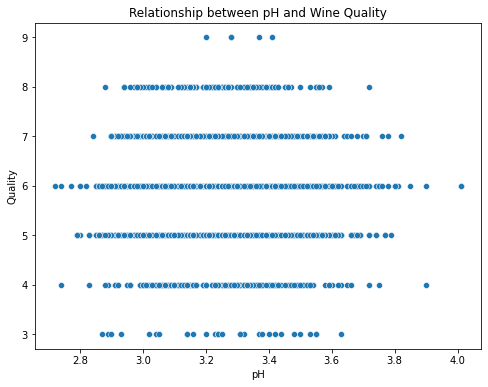

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pH', y='quality')
plt.title("Relationship between pH and Wine Quality")
plt.xlabel("pH")
plt.ylabel("Quality")
plt.show()

### Ques 18 : Analyze the correlations or create scatter plots between pH levels and quality. Are there any interactions between variables that affect wine quality?

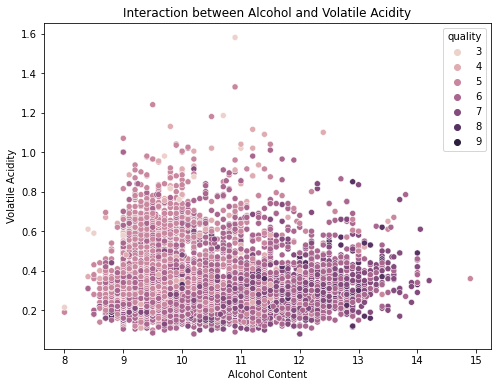

In [33]:

# Create a scatter plot to explore the interaction
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='alcohol', y='volatile acidity', hue='quality')
plt.title("Interaction between Alcohol and Volatile Acidity")
plt.xlabel("Alcohol Content")
plt.ylabel("Volatile Acidity")
plt.show()


### Ques 19 : Explore interactions between multiple variables (e.g., alcohol content, acidity) to see if they jointly influence wine quality. What is the average age of the wines in the dataset?

In [35]:

# Check if the 'production_year' column exists in the DataFrame
if 'production_year' in df.columns:
    # Check for missing values in the 'production_year' column
    if df['production_year'].isnull().any():
        print("There are missing values in the 'production_year' column.")
    else:
        # Check the data type of the 'production_year' column
        if pd.api.types.is_numeric_dtype(df['production_year']):
            # Calculate the average age based on the 'production_year' column
            average_age = 2023 - df['production_year'].mean()

            print("\nAverage Age of Wines (in years):")
            print(average_age)
        else:
            print("'production_year' column should be of numeric data type.")
else:
    print("The 'production_year' column does not exist in the DataFrame.")


The 'production_year' column does not exist in the DataFrame.


### Ques 20 :  Is there a relationship between residual sugar and sweetness perception (quality) of wines?

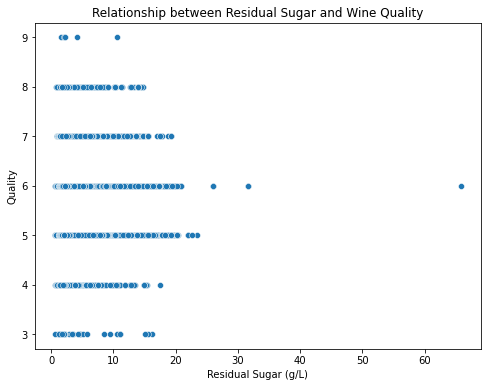

In [37]:
# Create a scatter plot to analyze the relationship between residual sugar and wine quality
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='residual sugar', y='quality')
plt.title("Relationship between Residual Sugar and Wine Quality")
plt.xlabel("Residual Sugar (g/L)")
plt.ylabel("Quality")
plt.show()

# THANK YOU